# Fire Detection Project

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten
from tensorflow.keras.layers import BatchNormalization,Dense,Conv2D,SeparableConv2D,MaxPooling2D,Activation,Flatten,Dropout

In [2]:
# define the initial learning rate, batch size, and number of epochs
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
INIT_LR = 0.1
BATCH_SIZE = 64
NUM_EPOCHS = 50 #50
lr_find = True
FAST_RUN = True

# #Loading the Dataset into python & Prepare training data

In [3]:
classes = ['Non_fire','fire']

fire = r"C:\Users\Abhishek Jaiswal\OneDrive\Desktop\fire detector\Fire_Detector\Fire"

images = []
labels = []

#fire class
for img in os.listdir(fire):
    image_path = os.path.join(fire, img)
    img = cv2.imread(image_path) 
    img = cv2.resize(img,(IMAGE_SIZE))
    images.append(img)
    labels.append([0,1][img=='Fire'])

    
images = np.array(images,dtype='float64')/255

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_1124\1288220990.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels.append([0,1][img=='Fire'])


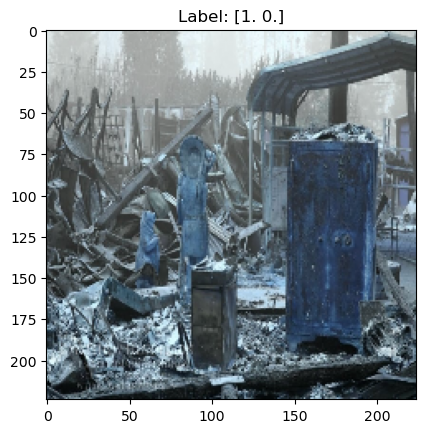

In [17]:
random_index = np.random.randint(len(images))


random_image = images[random_index]
random_label = labels[random_index]

# Display the image
plt.imshow(random_image)
plt.title('Label: {}'.format(random_label))
plt.show()

In [5]:
train_gen =ImageDataGenerator(rotation_range = 20,
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.3,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5],
    height_shift_range = 0.3)

In [6]:
labels = np.array(labels)
labels = utils.to_categorical(labels,num_classes=2)

classTotals = labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_1124\1252032975.py:5: RuntimeWarning: divide by zero encountered in divide
  classWeight = classTotals.max() / classTotals


In [7]:
aug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

## Defining the convolutional neural network architecture  

In [8]:
model = Sequential()

model.add(Conv2D(16,(3,3), activation = 'relu', padding = 'same', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(256,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

model.summary()

C:\Users\Abhishek Jaiswal\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 256)           │              

 Total params: 6,952,546 (26.52 MB)

 Trainable params: 6,950,018 (26.51 MB)

 Non-trainable params: 2,528 (9.88 KB)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.50, shuffle=True, random_state=42)

In [10]:
X_train.shape

(100, 224, 224, 3)

In [11]:
BATCH_SIZE

64

In [12]:
epochs = 50

detection = model.fit(
    train_gen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    validation_data=(X_test, y_test),
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
    epochs=epochs,  # Using the variable here
#     callbacks=callbacks
)

model.save('fire_detection.h5')

Epoch 1/50


C:\Users\Abhishek Jaiswal\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5833 - loss: 0.8453 - val_accuracy: 0.0000e+00 - val_loss: 1.3851
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.6250 - loss: 0.9487 - val_accuracy: 0.1188 - val_loss: 0.8580
Epoch 3/50


C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1188 - val_loss: 0.8580
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5556 - loss: 1.1789 - val_accuracy: 0.5644 - val_loss: 0.6807
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.4688 - loss: 1.2980 - val_accuracy: 1.0000 - val_loss: 0.5044
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.5044
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6389 - loss: 0.9009 - val_accuracy: 0.6040 - val_loss: 0.6712
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5938 - loss: 1.1457 - val_accuracy: 0.7030 - val_loss: 0.6207
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7030 - val_loss: 0.6207
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5833 - loss: 1.0929 - val_accuracy: 0.9901 - val_loss: 0.5377
Ep

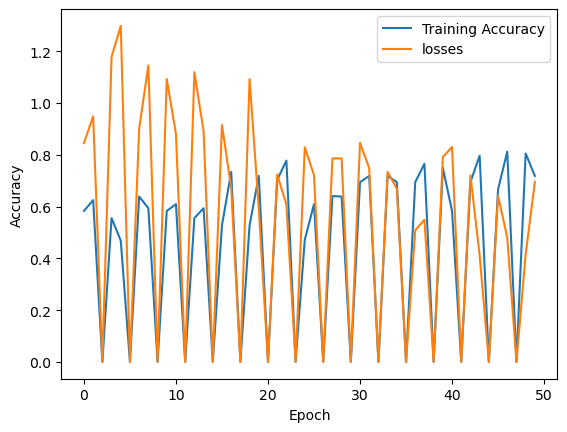

In [13]:
plt.plot(detection.history['accuracy'], label='Training Accuracy')
plt.plot(detection.history['loss'], label='losses')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

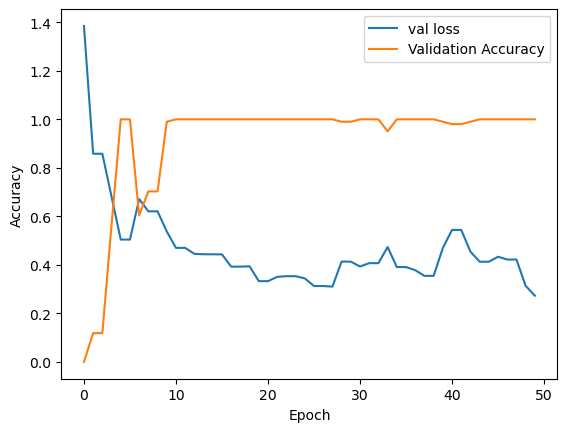

In [14]:
plt.plot(detection.history['val_loss'], label='val loss')
plt.plot(detection.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# #Making Prediction for single test image

In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Load and preprocess the image
img_path =r"C:\Users\Abhishek Jaiswal\OneDrive\Desktop\fire detector\Fire_Detector\output\testing\40.png" 
img = image.load_img(img_path, target_size=(224, 224))  # MobileNetV2 requires input shape (224, 224)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make prediction
predictions = model.predict(x)
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Print top 3 predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print("Prediction {}: {} (Confidence: {:.2f}%)".format(i+1, label, score*100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction 1: volcano (Confidence: 93.33%)
Prediction 2: geyser (Confidence: 0.76%)
Prediction 3: steam_locomotive (Confidence: 0.40%)
